# Assignment 1 NLP

### Group Members:
* Jyotsna	Sehgal 	C0900870
* Sandip 	Poudel	C0898762
* Vinamra Patel	C0892864
* Syed roman Uddin	C0906298
* Mohibkhan Pathan	C0894975

> **In this Assignment of NLP, we are going to predicts insights from current job market.We are going to predict salary based on reponsibilities for the job and other relevant features**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import nltk


## Datasets Aggregation

In [2]:
df1= pd.read_csv(r'./Accountant.csv')
df2= pd.read_csv(r'./Academic advisor.csv')
df3= pd.read_csv(r'./auditor.csv')
df4= pd.read_csv(r'./butcher.csv')
df5= pd.read_csv(r'./chef.csv')
df6= pd.read_csv(r'./finance manager.csv')
df7= pd.read_csv(r'./financial analyst.csv')
df8= pd.read_csv(r'./computer.csv')
df9= pd.read_csv(r'./dataanalyst.csv')
df10= pd.read_csv(r'./dataanalyst.csv')
df11= pd.read_csv(r'./healthcare.csv')
df12= pd.read_csv(r'./IT.csv')
df13= pd.read_csv(r'./librarian.csv')
df14= pd.read_csv(r'./teacher.csv')
df15= pd.read_csv(r'./Tutor.csv')
df15= pd.read_csv(r'./softwaredeveloper.csv')
df16= pd.read_csv(r'./Cyber security.csv')
df17= pd.read_csv(r'./network administrator.csv')



jobbank_df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17])
jobbank_df.head(20)

position                                 company  \
0              accountant                          508008 NWT Ltd   
1              accountant           Alvick tax and Accounting Inc   
2   accounting controller                     Accountant Staffing   
3              accountant                      2XL Transport Ltd.   
4              accountant                         Adapt Media Inc   
5              accountant  Byron D Smith Professional Corporation   
6              accountant                 FOREFRONT SECURITY INC.   
7              accountant                            SUNORA FOODS   
8              accountant              101291625 Saskatchewan Ltd   
9              accountant  Stevenson Industrial Refrigeration Ltd   
10             accountant                       Alberta AG Centre   
11             accountant                         Saeed & Company   
12      junior accountant                       BD Hawkins CPA CA   
13             accountant                  City of Campbell River   
14             accountant                       Boundary Electric   
15             accountant                 G.S. Brar & company Inc   
16             accountant                      Alpha Aviation Inc   
17             accountant                ML Freelance Recruitment   
18             accountant                           MSP Personnel   
19             accountant                   Surrey Police Service   

               location        posted date  \
0      Yellowknife (NT)  November 14, 2023   
1       North York (ON)  November 01, 2023   
2          Halifax (NS)  November 10, 2023   
3         Edmonton (AB)  November 15, 2023   
4          Toronto (ON)  November 01, 2023   
5   Spaniard's Bay (NL)  November 01, 2023   
6           Surrey (BC)  November 09, 2023   
7          Calgary (AB)  November 15, 2023   
8          Yorkton (SK)  November 03, 2023   
9        Saskatoon (SK)  November 07, 2023   
10      Crossfield (AB)  November 08, 2023   
11      North York (ON)  November 07, 2023   
12          Guelph (ON)  November 09, 2023   
13  Campbell River (BC)  November 07, 2023   
14     Grand Forks (BC)  November 08, 2023   
15          Surrey (BC)   October 26, 2023   
16           Delta (BC)  November 07, 2023   
17         Toronto (ON)  November 09, 2023   
18         Toronto (ON)  November 08, 2023   
19          Surrey (BC)  November 07, 2023   

                                             salaries  \
0   Salary:$25.00 to $30.00 hourly (to be negotiated)   
1   Salary:$45,000.00 to $55,000.00 annually (to b...   
2                                Salary not available   
3                      Salary:$17.57 to $35.30 hourly   
4                          Salary:$80,000.00 annually   
5   Salary:$40,000.00 to $60,000.00 annually (to b...   
6                                Salary:$29.00 hourly   
7                                Salary:$45.00 hourly   
8                                Salary:$40.00 hourly   
9            Salary:$50,000.00 to $60,000.00 annually   
10           Salary:$60,000.00 to $77,000.00 annually   
11                        Salary:$109,851.60 annually   
12  Salary:$18.00 to $22.00 hourly (to be negotiated)   
13                               Salary:$34.56 hourly   
14                     Salary:$30.00 to $35.00 hourly   
15                               Salary:$35.00 hourly   
16           Salary:$60,000.00 to $70,000.00 annually   
17                        Salary:$103,500.60 annually   
18                         Salary:$89,597.62 annually   
19                               Salary:$43.02 hourly   

                      Experience  \
0    1 year to less than 2 years   
1                5 years or more   
2                            NaN   
3                            NaN   
4   2 years to less than 3 years   
5    1 year to less than 2 years   
6    1 year to less than 2 years   
7                5 years or more   
8   2 years to less than 3 years   
9                            NaN   
10    

## Data Source Explanation
**We used jobbank.gc.ca i.e Canandian government Job Portal site to extract data. We used one of the python library beautiful soup to scrape data.**
* We Scraped data for multiple Job positions and concatenated in a single Dataframe 
* The attribitutes we scraped were Job position, company name, location, posted date, salary, experience required and Responsibilities and skills required for that job title.
* We are going to Utilize Responsibilities Column for this NLP Project Since It contains extensive text data.

## Dataset Preview and Summary Statistics

#### Dataset Shape: 20075 rows and 7 columns

In [3]:
jobbank_df.shape

(20075, 7)

In [4]:
jobbank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20075 entries, 0 to 107
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   position          20075 non-null  object
 1   company           20075 non-null  object
 2   location          19880 non-null  object
 3   posted date       20075 non-null  object
 4   salaries          20075 non-null  object
 5   Experience        7372 non-null   object
 6   Responsibilities  6838 non-null   object
dtypes: object(7)
memory usage: 1.2+ MB


**We can see that our dataset contains large number of null columns in a Responsibilities Column.** 
* The reason behind this is our data source i.e jobbank.ca contains job posting from different sites and the full details of this job position are hidden inside the Company's internal sites.


In [5]:
jobbank_df.describe()

position    company      location       posted date  \
count                20075      20075         19880             20075   
unique                1556       7343          1165               132   
top     software developer  What Jobs  Toronto (ON)  October 24, 2023   
freq                  1251       2664          2008              2187   

                    salaries                   Experience  \
count                  20075                         7372   
unique                  2177                            9   
top     Salary not available  1 year to less than 2 years   
freq                    9748                         2339   

                                         Responsibilities  
count                                                6838  
unique                                               3112  
top     Collect and document user's requirements and d...  
freq                                                  153

In [6]:
jobbank_df.dtypes

position            object
company             object
location            object
posted date         object
salaries            object
Experience          object
Responsibilities    object
dtype: object

#### Null Values: 
'location' columns has  195 null values,'Experience' column has 12703 null values and 'Responsibilities' column has 13237 null values

In [7]:
jobbank_df.isnull().sum()

position                0
company                 0
location              195
posted date             0
salaries                0
Experience          12703
Responsibilities    13237
dtype: int64

In [8]:
jobbank_df[jobbank_df['Responsibilities'].isnull()]

position  \
2                        accounting controller   
3                                   accountant   
9                                   accountant   
10                                  accountant   
11                                  accountant   
..                                         ...   
103               network system administrator   
104               network system administrator   
105               network system administrator   
106      WAN (wide area network) administrator   
107  Computer and information systems managers   

                                    company            location  \
2                       Accountant Staffing        Halifax (NS)   
3                        2XL Transport Ltd.       Edmonton (AB)   
9    Stevenson Industrial Refrigeration Ltd      Saskatoon (SK)   
10                        Alberta AG Centre     Crossfield (AB)   
11                          Saeed & Company     North York (ON)   
..                                      ...                 ...   
103                                  TEHORA          Lévis (QC)   
104                                  TEHORA         Québec (QC)   
105                                  TEHORA       Montréal (QC)   
106                             Rhesus inc.  Victoriaville (QC)   
107                              Scotiabank        Toronto (ON)   

           posted date                                  salaries Experience  \
2    November 10, 2023                      Salary not available        NaN   
3    November 15, 2023            Salary:$17.57 to $35.30 hourly        NaN   
9    November 07, 2023  Salary:$50,000.00 to $60,000.00 annually        NaN   
10   November 08, 2023  Salary:$60,000.00 to $77,000.00 annually        NaN   
11   November 07, 2023               Salary:$109,851.60 annually        NaN   
..                 ...                                       ...        ...   
103   October 24, 2023                      Salary not available        NaN   
104   October 24, 2023                      Salary not available        NaN   
105   October 24, 2023                      Salary not available        NaN   
106   October 23, 2023                      Salary not available        NaN   
107  November 09, 2023                      Salary not available        NaN   

    Responsibilities  
2                NaN  
3                NaN  
9                NaN  
10               NaN  
11               NaN  
..               ...  
103              NaN  
104              NaN  
105              NaN  
106              NaN  
107              NaN  

[13237 rows x 7 columns]

#### Duplicate records: 6787

In [9]:
jobbank_df.duplicated().sum()

6787

**Duplicate Record is because of the reason that we scraped data in interval of a week and same job postings are repeated**

#### Checking datatypes

In [10]:
# checking datatypes
jobbank_df.dtypes

position            object
company             object
location            object
posted date         object
salaries            object
Experience          object
Responsibilities    object
dtype: object

**All the data are in object i.e. string format**

##  Data Cleaning and Text Preprocessing Explanation

### Dropping Duplicates

In [11]:
jobbank_df.drop_duplicates(inplace=True)
jobbank_df.duplicated().sum()

0

**We dropped the duplicated column , now the duplicat columns remains 0**

### Dropping null values

In [12]:
jobbank_df.dropna(inplace=True,subset=['Responsibilities'])

jobbank_df.isnull().sum()

position            0
company             0
location            0
posted date         0
salaries            0
Experience          2
Responsibilities    0
dtype: int64

**We dropped all the null values in responsibilities column**

In [13]:
jobbank_df.dropna(inplace=True)
jobbank_df.isnull().sum()

position            0
company             0
location            0
posted date         0
salaries            0
Experience          0
Responsibilities    0
dtype: int64

#### Final shape of the dataset

In [14]:
jobbank_df.shape

(5099, 7)

## Text Preprocessing 

### 1. Responsibilities Column

In [15]:
jobbank_df['Responsibilities'][1:5]

1    Plan, set up and administer accounting systems...
4    Plan, set up and administer accounting systems...
5    Plan, set up and administer accounting systems...
6    Plan, set up and administer accounting systems...
Name: Responsibilities, dtype: object

#### Cleaning 'Responsibilities column'

In [16]:
!pip install contractions


In [17]:
import string
from nltk.corpus import stopwords 
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')


def clean_data(text):
    cleaned_text=text.lower()
    cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))
    cleaned_text=contractions.fix(cleaned_text)
    stop = stopwords.words('english')
    cleaned_text = [item for item in cleaned_text.split() if item not in stop]
        # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_text]
    
    # Join the lemmatized tokens back into a text
    cleaned_text = ' '.join(lemmatized_tokens)
    
    return cleaned_text
    
    
jobbank_df['Responsibilities_Cleaned']=jobbank_df['Responsibilities'].apply(clean_data)
    
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Text Cleaning Function:**

- The `clean_data` function performs following text cleaning operations:
  - Converts the text to lowercase.
  - Removes punctuation.
  - Expands contractions.
  - Removes stopwords.
  - Lemmatizes each token.

**Applying the Cleaning Function:**

- The function is applied to the 'Responsibilities' column of the DataFrame, and the cleaned text is stored in a new column 'Responsibilities_Cleaned'.


In [18]:
jobbank_df.head()

position                                 company             location  \
0  accountant                          508008 NWT Ltd     Yellowknife (NT)   
1  accountant           Alvick tax and Accounting Inc      North York (ON)   
4  accountant                         Adapt Media Inc         Toronto (ON)   
5  accountant  Byron D Smith Professional Corporation  Spaniard's Bay (NL)   
6  accountant                 FOREFRONT SECURITY INC.          Surrey (BC)   

         posted date                                           salaries  \
0  November 14, 2023  Salary:$25.00 to $30.00 hourly (to be negotiated)   
1  November 01, 2023  Salary:$45,000.00 to $55,000.00 annually (to b...   
4  November 01, 2023                         Salary:$80,000.00 annually   
5  November 01, 2023  Salary:$40,000.00 to $60,000.00 annually (to b...   
6  November 09, 2023                               Salary:$29.00 hourly   

                     Experience  \
0   1 year to less than 2 years   
1               5 years or more   
4  2 years to less than 3 years   
5   1 year to less than 2 years   
6   1 year to less than 2 years   

                                    Responsibilities  \
0  Prepare financial statements and reports, Prep...   
1  Plan, set up and administer accounting systems...   
4  Plan, set up and administer accounting systems...   
5  Plan, set up and administer accounting systems...   
6  Plan, set up and administer accounting systems...   

                            Responsibilities_Cleaned  
0  prepare financial statement report prepare inc...  
1  plan set administer accounting system train st...  
4  plan set administer accounting system train st...  
5  plan set administer accounting system ensure a...  
6  plan set administer accounting system prepare ...

In [19]:
print(len(jobbank_df['Responsibilities'].iloc[0]))
print(len(jobbank_df['Responsibilities_Cleaned'].iloc[0]))

120
104


## Keyword Extraction using various techniques

### Using traditional NLP techniques

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import ngrams

from collections import Counter



# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

start_time = datetime.now()


def extract_skills(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())



    # Get part of speech for each token
    pos_tags = pos_tag(tokens)

    # Keep only nouns and adjectives
    filtered_tokens = [word for word, pos in pos_tags if pos.startswith('NN') ]

    # Keep both unigrams and bigrams
    unigrams = [word for word, pos in pos_tags if pos.startswith('NN')]
    bigrams = [' '.join(bg) for bg in ngrams(filtered_tokens, 2)]

    return unigrams + bigrams


res_df=pd.DataFrame()
res_df['processed_keywords'] = jobbank_df['Responsibilities_Cleaned'].apply(extract_skills)

concatenated_df = pd.concat([jobbank_df['Responsibilities'], res_df['processed_keywords']], axis=1)

# Display the result
concatenated_df.head()

end_time = datetime.now()
print("Total Time Taken:", end_time-start_time)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Total Time Taken: 0:00:18.433734


**Explanation:**

- The code above imports necessary libraries and downloads required NLTK resources.
- The extract_skills function is defined to tokenize, determine part of speech, and generate unigrams and bigrams from the input text.
- A DataFrame is created to store processed keywords, and the results are displayed by concatenating the original 'Responsibilities' column with the processed keywords.
- The total time taken for the entire process is 0:00:18.989877.

In [21]:
res_df['processed_keywords'].head()

0    [statement, report, income, tax, return, accou...
1    [plan, system, staff, accuracy, compliance, pr...
4    [plan, system, staff, accuracy, compliance, pr...
5    [plan, system, accuracy, compliance, procedure...
6    [plan, system, information, individual, depart...
Name: processed_keywords, dtype: object

### Comparing original 'Responsibilities'  column record with the preprocessed one using traditional NLP techniques

In [22]:
print(concatenated_df['Responsibilities'].iloc[0])
concatenated_df['processed_keywords'].iloc[0]

Prepare financial statements and reports, Prepare income tax returns from accounting records, Examine accounting records


['statement',
 'report',
 'income',
 'tax',
 'return',
 'accounting',
 'record',
 'examine',
 'accounting',
 'record',
 'statement report',
 'report income',
 'income tax',
 'tax return',
 'return accounting',
 'accounting record',
 'record examine',
 'examine accounting',
 'accounting record']

### Using Rake_NLTK
>RAKE (Rapid Automatic Keyword Extraction) is a well-known keyword extraction method that finds the most relevant words or phrases in a piece of text using a set of stopwords and phrase delimiters. Rake nltk is an expanded version of RAKE that is supported by NLTK.

In [23]:
!pip install rake_nltk

In [24]:
jobbank_df.columns

Index(['position', 'company', 'location', 'posted date', 'salaries',
       'Experience', 'Responsibilities', 'Responsibilities_Cleaned'],
      dtype='object')

In [25]:
from rake_nltk import Rake


In [26]:
import pandas as pd
from rake_nltk import Rake

start_time = datetime.now()


# Creating a Rake object
rake = Rake()

# Function to extract keywords using RAKE
def extract_keywords(text):
    rake.extract_keywords_from_text(text)
    keywords = rake.get_ranked_phrases()
    return keywords

# Applying the function to the 'responsibilities' column

res_df['rake_keywords'] = jobbank_df['Responsibilities_Cleaned'].apply(extract_keywords)

concatenated_df = pd.concat([jobbank_df['Responsibilities_Cleaned'], res_df['rake_keywords']], axis=1)

concatenated_df.head()
end_time = datetime.now()
print("Total Time Taken:", end_time-start_time)


Total Time Taken: 0:00:04.987091


**Explanation:**

- The code starts by importing necessary libraries, including pandas, Rake from rake_nltk, and datetime for performance evaluation.

- A Rake object is created to facilitate keyword extraction using the RAKE algorithm.

- The `extract_keywords` function is defined to apply RAKE to extract keywords from the input text. The extracted keywords are returned as a list.

- The function is then applied to the 'Responsibilities' column of the DataFrame, and the results are stored in a new column 'rake_keywords' in the DataFrame 'res_df'.

- The original 'Responsibilities_Cleaned' column and the newly created 'rake_keywords' column are concatenated into a new DataFrame named 'concatenated_df'.

- Finally, the resulting DataFrame and the total time taken for the entire process are displayed.

In [27]:
# Assuming jobbank_df and res_df are your DataFrames
print(pd.concat([jobbank_df['Responsibilities_Cleaned'], res_df['rake_keywords']], axis=1))


                             Responsibilities_Cleaned  \
0   prepare financial statement report prepare inc...   
1   plan set administer accounting system train st...   
4   plan set administer accounting system train st...   
5   plan set administer accounting system ensure a...   
6   plan set administer accounting system prepare ...   
..                                                ...   
8   maintain troubleshoot administer use local are...   
9   maintain troubleshoot administer use local are...   
28  maintain troubleshoot administer use local are...   
35  maintain troubleshoot administer use local are...   
50  maintain troubleshoot administer use local are...   

                                        rake_keywords  
0   [prepare financial statement report prepare in...  
1   [plan set administer accounting system train s...  
4   [plan set administer accounting system train s...  
5   [plan set administer accounting system ensure ...  
6   [plan set administer accounting

### Comparing original 'Responsibilities'  column record with the preprocessed one with rake algorithm

In [28]:
print(concatenated_df['Responsibilities_Cleaned'].iloc[0])
concatenated_df['rake_keywords'].iloc[0]

prepare financial statement report prepare income tax return accounting record examine accounting record


['prepare financial statement report prepare income tax return accounting record examine accounting record']

In [29]:
res_df.head()

processed_keywords  \
0  [statement, report, income, tax, return, accou...   
1  [plan, system, staff, accuracy, compliance, pr...   
4  [plan, system, staff, accuracy, compliance, pr...   
5  [plan, system, accuracy, compliance, procedure...   
6  [plan, system, information, individual, depart...   

                                       rake_keywords  
0  [prepare financial statement report prepare in...  
1  [plan set administer accounting system train s...  
4  [plan set administer accounting system train s...  
5  [plan set administer accounting system ensure ...  
6  [plan set administer accounting system prepare...

###  Using Spacy

In [30]:
!pip3 install spacy


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\asus\\anaconda3\\lib\\site-packages\\idna-3.4.dist-info\\METADATA'



In [31]:
import spacy
from collections import Counter
from string import punctuation

start_time = datetime.now()

nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    # Get unigrams
    for token in doc:
        if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)
    
    # Get bigrams
    bigrams = ngrams(text.lower().split(), 2)
    result.extend([' '.join(bigram) for bigram in bigrams])
    
    return result

res_df['spacy_keywords'] = jobbank_df['Responsibilities_Cleaned'].apply(get_hotwords)

concatenated_df = pd.concat([jobbank_df['Responsibilities_Cleaned'], res_df['spacy_keywords']], axis=1)

concatenated_df.head()
end_time = datetime.now()
print("Total Time Taken:", end_time-start_time)



Total Time Taken: 0:01:03.169308


**Explanation:**

- The code starts by importing necessary libraries, including spacy, Counter, punctuation from the string module, and datetime for performance evaluation.

- The spaCy English language model is loaded using `spacy.load("en_core_web_sm")`.

- The `get_hotwords` function is defined to process the input text with spaCy and extract hotwords (adjectives and nouns) and bigrams. The extracted hotwords are returned as a list.

- The function is then applied to the 'Responsibilities_Cleaned' column of the DataFrame, and the results are stored in a new column 'spacy_keywords' in the DataFrame 'res_df'.

- The original 'Responsibilities_Cleaned' column and the newly created 'spacy_keywords' column are concatenated into a new DataFrame named 'concatenated_df'.

- Finally, the resulting DataFrame and the total time taken for the entire process are displayed.


In [32]:
print(concatenated_df['Responsibilities_Cleaned'].iloc[0])
concatenated_df['spacy_keywords'].iloc[0]

prepare financial statement report prepare income tax return accounting record examine accounting record


['financial',
 'statement',
 'report',
 'income',
 'tax',
 'return',
 'accounting',
 'record',
 'examine',
 'accounting',
 'record',
 'prepare financial',
 'financial statement',
 'statement report',
 'report prepare',
 'prepare income',
 'income tax',
 'tax return',
 'return accounting',
 'accounting record',
 'record examine',
 'examine accounting',
 'accounting record']

### Using textrank

In [33]:
!pip3 install pytextrank

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\asus\\anaconda3\\lib\\site-packages\\idna-3.4.dist-info\\METADATA'



In [34]:
import spacy
import pytextrank

start_time = datetime.now()

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")

res_df['textrank_keywords'] = jobbank_df['Responsibilities_Cleaned'].apply(nlp)

concatenated_df = pd.concat([jobbank_df['Responsibilities_Cleaned'], res_df['textrank_keywords']], axis=1)

concatenated_df.head()

end_time = datetime.now()
print("Total Time Taken:", end_time-start_time)


Total Time Taken: 0:01:31.869100


In [35]:
print(concatenated_df['Responsibilities_Cleaned'].iloc[0])
concatenated_df['textrank_keywords'].iloc[0]

prepare financial statement report prepare income tax return accounting record examine accounting record


prepare financial statement report prepare income tax return accounting record examine accounting record

### Checking which method is better to preprocess reponsibilities column

In [36]:
print(res_df['processed_keywords'].iloc[0])
print(res_df['rake_keywords'].iloc[0])
print(res_df['spacy_keywords'].iloc[0])
print(res_df['textrank_keywords'].iloc[0])


['statement', 'report', 'income', 'tax', 'return', 'accounting', 'record', 'examine', 'accounting', 'record', 'statement report', 'report income', 'income tax', 'tax return', 'return accounting', 'accounting record', 'record examine', 'examine accounting', 'accounting record']
['prepare financial statement report prepare income tax return accounting record examine accounting record']
['financial', 'statement', 'report', 'income', 'tax', 'return', 'accounting', 'record', 'examine', 'accounting', 'record', 'prepare financial', 'financial statement', 'statement report', 'report prepare', 'prepare income', 'income tax', 'tax return', 'return accounting', 'accounting record', 'record examine', 'examine accounting', 'accounting record']
prepare financial statement report prepare income tax return accounting record examine accounting record


## Comparing Different Text Preprocessing Techniques.

>We used diiferent NLP Techniques such as tokenization,lemmatize,pos tags, unigram, bigram, Name Entity Recognition and we also used some of the Text processing libraries such as Spacy, TextRank, Rake.  We Compared all methods and get to know that processed keywords using traditional NLP techniques gives the best result i.e.It contains the most important words for model training.We Finalized 'processed_keywords' columns as best output to identify keywords.

In [37]:
jobbank_df['Responsibilities_keywords']=res_df['processed_keywords']
jobbank_df.head()

position                                 company             location  \
0  accountant                          508008 NWT Ltd     Yellowknife (NT)   
1  accountant           Alvick tax and Accounting Inc      North York (ON)   
4  accountant                         Adapt Media Inc         Toronto (ON)   
5  accountant  Byron D Smith Professional Corporation  Spaniard's Bay (NL)   
6  accountant                 FOREFRONT SECURITY INC.          Surrey (BC)   

         posted date                                           salaries  \
0  November 14, 2023  Salary:$25.00 to $30.00 hourly (to be negotiated)   
1  November 01, 2023  Salary:$45,000.00 to $55,000.00 annually (to b...   
4  November 01, 2023                         Salary:$80,000.00 annually   
5  November 01, 2023  Salary:$40,000.00 to $60,000.00 annually (to b...   
6  November 09, 2023                               Salary:$29.00 hourly   

                     Experience  \
0   1 year to less than 2 years   
1               5 years or more   
4  2 years to less than 3 years   
5   1 year to less than 2 years   
6   1 year to less than 2 years   

                                    Responsibilities  \
0  Prepare financial statements and reports, Prep...   
1  Plan, set up and administer accounting systems...   
4  Plan, set up and administer accounting systems...   
5  Plan, set up and administer accounting systems...   
6  Plan, set up and administer accounting systems...   

                            Responsibilities_Cleaned  \
0  prepare financial statement report prepare inc...   
1  plan set administer accounting system train st...   
4  plan set administer accounting system train st...   
5  plan set administer accounting system ensure a...   
6  plan set administer accounting system prepare ...   

                           Responsibilities_keywords  
0  [statement, report, income, tax, return, accou...  
1  [plan, system, staff, accuracy, compliance, pr...  
4  [plan, system, staff, accuracy, compliance, pr...  
5  [plan, system, accuracy, compliance, procedure...  
6  [plan, system, information, individual, depart...

### Note
>We are primarily using responsibilities column in this project but we are also using other columns for our model training, So we need to preprocess them too. We already prerocessed other columns in advance python assginment so we are resuing those portions.

### 2. Salaries Column

In [38]:
# Filtering all the records where salaries column conatin the 'hourly' keyword
filtered_hourly_df = jobbank_df[jobbank_df['salaries'].str.contains('hourly', case=False, na=False)]


In [39]:
filtered_hourly_df.shape

(4716, 9)

In [40]:
# Filtering all the records where salaries column  does not conatin the 'hourly' keyword that would be yearly salary
filtered_yearly_df = jobbank_df[~jobbank_df['salaries'].str.contains('hourly', case=False, na=False)]

In [41]:
filtered_yearly_df.head()

position  \
1                                          accountant   
4                                          accountant   
5                                          accountant   
22                                         accountant   
42  chartered professional accountant, chartered a...   

                                              company  \
1                       Alvick tax and Accounting Inc   
4                                     Adapt Media Inc   
5              Byron D Smith Professional Corporation   
22  Régie de l'aqueduc intermunicipale du Bas-Rich...   
42               Truload Transportation Services Ltd.   

                          location        posted date  \
1                  North York (ON)  November 01, 2023   
4                     Toronto (ON)  November 01, 2023   
5              Spaniard's Bay (NL)  November 01, 2023   
22  Saint-Denis-sur-Richelieu (QC)  November 10, 2023   
42                      Nisku (AB)  November 14, 2023   

                                             salaries  \
1   Salary:$45,000.00 to $55,000.00 annually (to b...   
4                          Salary:$80,000.00 annually   
5   Salary:$40,000.00 to $60,000.00 annually (to b...   
22  Salary:$40,000.00 to $60,000.00 annually (to b...   
42  Salary:$80,000.00 to $120,000.00 annually (to ...   

                      Experience  \
1                5 years or more   
4   2 years to less than 3 years   
5    1 year to less than 2 years   
22  2 years to less than 3 years   
42   1 year to less than 2 years   

                                     Responsibilities  \
1   Plan, set up and administer accounting systems...   
4   Plan, set up and administer accounting systems...   
5   Plan, set up and administer accounting systems...   
22  Ensure accuracy and compliance to accounting s...   
42  Plan, set up and administer accounting systems...   

                             Responsibilities_Cleaned  \
1   plan set administer accounting system train st...   
4   plan set administer accounting system train st...   
5   plan set administer accounting system ensure a...   
22  ensure accuracy compliance accounting standard...   
42  plan set administer accounting system ensure a...   

                            Responsibilities_keywords  
1   [plan, system, staff, accuracy, compliance, pr...  
4   [plan, system, staff, accuracy, compliance, pr...  
5   [plan, system, accuracy, compliance, procedure...  
22  [accuracy, compliance, procedure, control, rep...  
42  [plan, system, accuracy, compliance, procedure...

In [42]:
filtered_yearly_df.shape

(383, 9)

#### Algorithm to process salaries column:

* In filtered hourly df , we have hourly salary of employee, we will now convert that to annualy by assuming 40 hours per week and 52 weeks in a year.
* First we will remove text from salary column and include only numbers


In [43]:
filtered_hourly_df['salaries']

0     Salary:$25.00 to $30.00 hourly (to be negotiated)
6                                  Salary:$29.00 hourly
7                                  Salary:$45.00 hourly
8                                  Salary:$40.00 hourly
12    Salary:$18.00 to $22.00 hourly (to be negotiated)
                            ...                        
8     Salary:$24.00 to $28.00 hourly (to be negotiated)
9                                  Salary:$35.00 hourly
28                                 Salary:$27.00 hourly
35                                 Salary:$39.00 hourly
50                                 Salary:$39.15 hourly
Name: salaries, Length: 4716, dtype: object

**Converting hourly salary to annual salary by extracting digits, taking median from range**

In [44]:
# Define a function to extract and convert the hourly rate or calculate the median for a range
import re
def extract_hourly_rate(salary_string):
    # Check for a range pattern at the end of the string
    range_match = re.search(r'\$\d+\.\d+ to \$\d+\.\d+', salary_string)
    if range_match:
        values = [float(match.group()[1:]) for match in re.finditer(r'\$\d+\.\d+', range_match.group())]
        median_value = sum(values) / len(values)
        median_annual_salary = median_value*40*52
        return median_annual_salary
    
    # Check for an individual value
    match = re.search(r'\$\d+\.\d+', salary_string)
    if match:
        salary = float(match.group()[1:])  # Extract and convert the hourly rate
        annual_salary = salary*40*52
        return annual_salary

    # If neither pattern matches, return None
    return None

# Apply the function to the 'salary' column to replace the strings with numerical values or medians
filtered_hourly_df['salaries'] = filtered_hourly_df['salaries'].apply(extract_hourly_rate)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12748\3148654645.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_df['salaries'] = filtered_hourly_df['salaries'].apply(extract_hourly_rate)


In [45]:
filtered_hourly_df['salaries'].shape

(4716,)

In [46]:
filtered_yearly_df

position  \
1                                            accountant   
4                                            accountant   
5                                            accountant   
22                                           accountant   
42    chartered professional accountant, chartered a...   
...                                                 ...   
1098      operations director - administrative services   
1105                             administrative manager   
1201                    regional administrative manager   
1764      operations director - administrative services   
1774  service technician - household and business eq...   

                                                company  \
1                         Alvick tax and Accounting Inc   
4                                       Adapt Media Inc   
5                Byron D Smith Professional Corporation   
22    Régie de l'aqueduc intermunicipale du Bas-Rich...   
42                 Truload Transportation Services Ltd.   
...                                                 ...   
1098                                         Québec VTC   
1105                                      Lucent Quartz   
1201                                  Global Art Canada   
1764                            Select People Solutions   
1774                                   PT Papertech Inc   

                            location         posted date  \
1                    North York (ON)   November 01, 2023   
4                       Toronto (ON)   November 01, 2023   
5                Spaniard's Bay (NL)   November 01, 2023   
22    Saint-Denis-sur-Richelieu (QC)   November 10, 2023   
42                        Nisku (AB)   November 14, 2023   
...                              ...                 ...   
1098    Saint-Roch-de-l'Achigan (QC)  September 20, 2023   
1105                    Concord (ON)    October 30, 2023   
1201                    Toronto (ON)     August 11, 2023   
1764                 Lethbridge (AB)  September 27, 2023   
1774            North Vancouver (BC)  September 18, 2023   

                                               salaries  \
1     Salary:$45,000.00 to $55,000.00 annually (to b...   
4                            Salary:$80,000.00 annually   
5     Salary:$40,000.00 to $60,000.00 annually (to b...   
22    Salary:$40,000.00 to $60,000.00 annually (to b...   
42    Salary:$80,000.00 to $120,000.00 annually (to ...   
...                                                 ...   
1098                         Salary:$45,000.00 annually   
1105                         Salary:$72,000.00 annually   
1201                         Salary:$76,500.00 annually   
1764  Salary:$90,000.00 to $115,000.00 annually (to ...   
1774                         Salary:$41,000.00 annually   

                        Experience  \
1                  5 years or more   
4     2 years to less than 3 years   
5      1 year to less than 2 years   
22    2 years to less than 3 years   
42     1 year to less than 2 years   
...                            ...   
1098               5 years or more   
1105  3 years to less than 5 years   
1201               5 years or more   
1764               5 years or more   
1774   1 year to less than 2 years   

                                       Responsibilities  \
1     Plan, set up and administer accounting systems...   
4     Plan, set up and administer accounting systems...   
5     Plan, set up and administer accounting systems...   
22    Ensure accuracy and compliance to accounting s...   
42    Plan, set up and administer accounting systems...   
...                                                 ...   
1098  Direct and advise staff engaged in providing r...   
1105  Plan, administer and control budgets for clien...   
1201  Direct and advise staff engaged in providing r...   
1764  Direct and control corporate governance and re...   
1774  Install, maintain and repair electronic equipm...   

                               Re

* Extracting digits from annual salary and taking median from range

In [47]:
filtered_annual_df = filtered_yearly_df[filtered_yearly_df['salaries'].str.contains('annually', case=False, na=False)]

In [48]:
filtered_annual_df['salaries']

1       Salary:$45,000.00 to $55,000.00 annually (to b...
4                              Salary:$80,000.00 annually
5       Salary:$40,000.00 to $60,000.00 annually (to b...
22      Salary:$40,000.00 to $60,000.00 annually (to b...
42      Salary:$80,000.00 to $120,000.00 annually (to ...
                              ...                        
1098                           Salary:$45,000.00 annually
1105                           Salary:$72,000.00 annually
1201                           Salary:$76,500.00 annually
1764    Salary:$90,000.00 to $115,000.00 annually (to ...
1774                           Salary:$41,000.00 annually
Name: salaries, Length: 351, dtype: object

In [49]:
filtered_monthly_df = jobbank_df[jobbank_df['salaries'].str.contains('monthly', case=False, na=False)]

In [50]:
filtered_monthly_df.shape

(18, 9)

**filtered_annual_df is our actual annualy salary df**

In [51]:
def extract_annual_rate(salary_string):
    # Check for a range pattern at the end of the string
        range_pattern = r'\$[\d,]+\.\d{2}\s+to\s+\$[\d,]+\.\d{2}'

        # Use re.search to find the pattern in the string
        range_match = re.search(range_pattern, salary_string)
        if range_match:
            # Extract the lower and upper values
            values = [float(match.replace('$', '').replace(',', '')) for match in re.findall(r'\$[\d,]+\.\d{2}', range_match.group())]

            # Calculate the median
            if values:
                median_value = sum(values) / len(values)
                return median_value

        # Check for an individual value
        match = re.search(r'\$[\d,]+\d', salary_string)
        if match:
            salary_with_commas = match.group()
            salary = float(salary_with_commas.replace('$', '').replace(',', ''))
            return salary

        # If neither pattern matches, return None
        return None

# Apply the function to the 'salary' column to replace the strings with numerical values or medians
filtered_annual_df['salaries'] = filtered_annual_df['salaries'].apply(extract_annual_rate)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12748\1804944788.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_annual_df['salaries'] = filtered_annual_df['salaries'].apply(extract_annual_rate)


 **Salary Extraction Function:**
    
    - Checks for a range pattern at the end of the string using regular expressions.
    - If a range pattern is found, extracts the lower and upper values, calculates the median, and returns it.
    - If an individual value is found, extracts and returns the numerical value.
    - If neither pattern matches, returns None.

In [52]:
filtered_annual_df.shape

(351, 9)

In [53]:
filtered_hourly_df.shape

(4716, 9)

#### Concatenating filtered_hourly_df and filtered_annual_df to create one dataframe having annual salaries

In [54]:
combined_job_df = pd.concat([filtered_hourly_df,filtered_annual_df])

In [55]:
combined_job_df.head()

position                     company          location  \
0          accountant              508008 NWT Ltd  Yellowknife (NT)   
6          accountant     FOREFRONT SECURITY INC.       Surrey (BC)   
7          accountant                SUNORA FOODS      Calgary (AB)   
8          accountant  101291625 Saskatchewan Ltd      Yorkton (SK)   
12  junior accountant           BD Hawkins CPA CA       Guelph (ON)   

          posted date  salaries                    Experience  \
0   November 14, 2023   57200.0   1 year to less than 2 years   
6   November 09, 2023   60320.0   1 year to less than 2 years   
7   November 15, 2023   93600.0               5 years or more   
8   November 03, 2023   83200.0  2 years to less than 3 years   
12  November 09, 2023   41600.0  3 years to less than 5 years   

                                     Responsibilities  \
0   Prepare financial statements and reports, Prep...   
6   Plan, set up and administer accounting systems...   
7   Plan, set up and administer accounting systems...   
8   Plan, set up and administer accounting systems...   
12  Ensure accuracy and compliance to accounting s...   

                             Responsibilities_Cleaned  \
0   prepare financial statement report prepare inc...   
6   plan set administer accounting system prepare ...   
7   plan set administer accounting system train st...   
8   plan set administer accounting system train st...   
12  ensure accuracy compliance accounting standard...   

                            Responsibilities_keywords  
0   [statement, report, income, tax, return, accou...  
6   [plan, system, information, individual, depart...  
7   [plan, system, staff, arrange, training, staff...  
8   [plan, system, staff, arrange, training, staff...  
12  [accuracy, compliance, procedure, control, inf...

In [56]:
# checking shape of dataframe
combined_job_df.shape

(5067, 9)

### 3. Posted Date

In [57]:
# Exploring 'posted date' column top 5 records
combined_job_df['posted date'].head()

0     November 14, 2023
6     November 09, 2023
7     November 15, 2023
8     November 03, 2023
12    November 09, 2023
Name: posted date, dtype: object

In [58]:
# Converting 'posted date' to datetime format
combined_job_df['posted date'] = pd.to_datetime(combined_job_df['posted date'])

# Display the modified DataFrame
combined_job_df.head()

position                     company          location  \
0          accountant              508008 NWT Ltd  Yellowknife (NT)   
6          accountant     FOREFRONT SECURITY INC.       Surrey (BC)   
7          accountant                SUNORA FOODS      Calgary (AB)   
8          accountant  101291625 Saskatchewan Ltd      Yorkton (SK)   
12  junior accountant           BD Hawkins CPA CA       Guelph (ON)   

   posted date  salaries                    Experience  \
0   2023-11-14   57200.0   1 year to less than 2 years   
6   2023-11-09   60320.0   1 year to less than 2 years   
7   2023-11-15   93600.0               5 years or more   
8   2023-11-03   83200.0  2 years to less than 3 years   
12  2023-11-09   41600.0  3 years to less than 5 years   

                                     Responsibilities  \
0   Prepare financial statements and reports, Prep...   
6   Plan, set up and administer accounting systems...   
7   Plan, set up and administer accounting systems...   
8   Plan, set up and administer accounting systems...   
12  Ensure accuracy and compliance to accounting s...   

                             Responsibilities_Cleaned  \
0   prepare financial statement report prepare inc...   
6   plan set administer accounting system prepare ...   
7   plan set administer accounting system train st...   
8   plan set administer accounting system train st...   
12  ensure accuracy compliance accounting standard...   

                            Responsibilities_keywords  
0   [statement, report, income, tax, return, accou...  
6   [plan, system, information, individual, depart...  
7   [plan, system, staff, arrange, training, staff...  
8   [plan, system, staff, arrange, training, staff...  
12  [accuracy, compliance, procedure, control, inf...

## ENRICHING the datset : Feature engineering

### Preprocessing Experience Column : Creating Minimum Experience and Maximum Experience Column

In [59]:
# Exploring the first five records of 'Experience' column
combined_job_df['Experience'].head()

0      1 year to less than 2 years
6      1 year to less than 2 years
7                  5 years or more
8     2 years to less than 3 years
12    3 years to less than 5 years
Name: Experience, dtype: object

In [60]:
# Checking the unique values in 'Experience' column
combined_job_df['Experience'].unique()

array(['1 year to less than 2 years', '5 years or more',
       '2 years to less than 3 years', '3 years to less than 5 years',
       'Will train', '1 to less than 7 months', 'Experience an asset',
       '7 months to less than 1 year'], dtype=object)

### Function to extract numeric values from 'Experience' column and adding smaller digit to 'Minimum Experience' column and bigger one to 'Maximum Experience'

In [61]:
# Function to parse experience values
def parse_experience(experience):
    if pd.isna(experience) or 'will train' in experience.lower() or 'experience an asset' in experience.lower():
        return 0, 0

    # Extract numeric values
    exp_values = [int(value) if value.isdigit() else 0 for value in experience.split() if value.replace('.', '').isdigit()]

    if not exp_values:
        return np.nan, np.nan

    # If only 1 digit is present, add it to minimum experience and keep maximum experience as nan
    if len(exp_values) == 1:
        return exp_values[0], np.nan

    min_exp, max_exp = exp_values
    if 'year' in experience:
        if 'month' in experience:
            # If both years and months are present, convert months to years    
            min_exp=min_exp/12    

        return min_exp, max_exp
    elif 'month' in experience:
        # If only months are present, convert to years
        return min_exp / 12, max_exp / 12
    else:
        # If no indicator is present, assume years
        return min_exp, max_exp

# Apply the function to create new columns
combined_job_df[['Minimum Experience', 'Maximum Experience']] = combined_job_df['Experience'].apply(parse_experience).apply(pd.Series)




In [62]:
# Exploring the top 5 records of new dataframe
combined_job_df.head()

position                     company          location  \
0          accountant              508008 NWT Ltd  Yellowknife (NT)   
6          accountant     FOREFRONT SECURITY INC.       Surrey (BC)   
7          accountant                SUNORA FOODS      Calgary (AB)   
8          accountant  101291625 Saskatchewan Ltd      Yorkton (SK)   
12  junior accountant           BD Hawkins CPA CA       Guelph (ON)   

   posted date  salaries                    Experience  \
0   2023-11-14   57200.0   1 year to less than 2 years   
6   2023-11-09   60320.0   1 year to less than 2 years   
7   2023-11-15   93600.0               5 years or more   
8   2023-11-03   83200.0  2 years to less than 3 years   
12  2023-11-09   41600.0  3 years to less than 5 years   

                                     Responsibilities  \
0   Prepare financial statements and reports, Prep...   
6   Plan, set up and administer accounting systems...   
7   Plan, set up and administer accounting systems...   
8   Plan, set up and administer accounting systems...   
12  Ensure accuracy and compliance to accounting s...   

                             Responsibilities_Cleaned  \
0   prepare financial statement report prepare inc...   
6   plan set administer accounting system prepare ...   
7   plan set administer accounting system train st...   
8   plan set administer accounting system train st...   
12  ensure accuracy compliance accounting standard...   

                            Responsibilities_keywords  Minimum Experience  \
0   [statement, report, income, tax, return, accou...                 1.0   
6   [plan, system, information, individual, depart...                 1.0   
7   [plan, system, staff, arrange, training, staff...                 5.0   
8   [plan, system, staff, arrange, training, staff...                 2.0   
12  [accuracy, compliance, procedure, control, inf...                 3.0   

    Maximum Experience  
0                  2.0  
6                  2.0  
7                  NaN  
8                  3.0  
12                 5.0

In [63]:
# Checking the rows if any where minimum experience is more than maximum experience
min_more_rows=combined_job_df.loc[combined_job_df['Minimum Experience']>combined_job_df['Maximum Experience']]
min_more_rows.shape

(0, 11)

### Creating a new 'Category' column by processing the position column

In [64]:
# Set options to display full DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [65]:
# Printing all the unique values of position column
for i in combined_job_df['position'].unique():
    print(i)

accountant
junior accountant
tax accountant
general accountant
senior accountant
financial accountant
project accountant
assistant accountant
accountants supervisor
auditor - finance
tax specialist
financial management officer
internal auditor
financial control officer
accountant-controller
analyst-accountant
financial auditor
financial advisor
educational counsellor
associate financial advisor
service advisor - auto repair
financial services advisor
health and safety advisor
night auditor - hotel
hotel night auditor
butcher apprentice
butcher - wholesale
butcher, retail
butcher - butcher shop
retail butcher
butcher - retail or wholesale
butcher - delicatessen
grocery store butcher
butcher, slaughterhouse
butcher, industrial
industrial butcher
butcher helper
supermarket butcher
butcher helper - meat processing
industrial butcher helper
apprentice butcher - retail or wholesale
industrial meat cutter
slaughterer - meat packing plant
poultry preparer
poultry hanger
meat trimmer
trimmer - 

#### Applying NLTK techniques to preprocess position column
**Steps Involved**
* Tokenization
* Removing stop words
* Lemmatization
* Frequency Distribution 

In [66]:
from nltk.probability import FreqDist



# Drop rows with missing values in 'position' column
combined_job_df = combined_job_df.dropna(subset=['position'])

# Tokenize the text and remove punctuation
combined_job_df['position'] = combined_job_df['position'].apply(lambda x: word_tokenize(str(x)))
combined_job_df['position'] = combined_job_df['position'].apply(lambda x: [word.lower() for word in x if word.isalpha()])

# Remove stop words
stop_words = set(stopwords.words('english'))
combined_job_df['position'] = combined_job_df['position'].apply(lambda x: [word for word in x if word not in stop_words])

# # Lemmatization

lemmatizer = WordNetLemmatizer()
combined_job_df['position_processed'] = combined_job_df['position'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Flatten the list of lists to a single list of words
all_words = [word for sublist in combined_job_df['position_processed'].tolist() for word in sublist]

# Calculate the frequency distribution
fdist = FreqDist(all_words)

# Display the most common words
print(fdist.most_common())


[('service', 766), ('manager', 628), ('technician', 579), ('software', 501), ('chef', 492), ('business', 489), ('financial', 485), ('food', 421), ('beverage', 375), ('server', 373), ('communication', 367), ('computer', 335), ('support', 326), ('butcher', 309), ('system', 257), ('retail', 247), ('analyst', 244), ('general', 235), ('developer', 230), ('network', 221), ('administrative', 212), ('engineer', 204), ('user', 173), ('security', 130), ('technical', 124), ('cnc', 119), ('control', 117), ('information', 110), ('database', 109), ('supervisor', 104), ('assistant', 102), ('officer', 100), ('sale', 99), ('administrator', 97), ('numerical', 95), ('programmer', 90), ('accountant', 89), ('specialist', 86), ('technology', 85), ('wholesale', 76), ('machinist', 75), ('chief', 71), ('operation', 69), ('school', 69), ('executive', 68), ('equipment', 66), ('data', 66), ('guard', 64), ('teacher', 63), ('head', 58), ('development', 58), ('nurse', 58), ('operator', 56), ('practical', 56), ('cook

In [67]:
combined_job_df.head()

position                     company          location  \
0           [accountant]              508008 NWT Ltd  Yellowknife (NT)   
6           [accountant]     FOREFRONT SECURITY INC.       Surrey (BC)   
7           [accountant]                SUNORA FOODS      Calgary (AB)   
8           [accountant]  101291625 Saskatchewan Ltd      Yorkton (SK)   
12  [junior, accountant]           BD Hawkins CPA CA       Guelph (ON)   

   posted date  salaries                    Experience  \
0   2023-11-14   57200.0   1 year to less than 2 years   
6   2023-11-09   60320.0   1 year to less than 2 years   
7   2023-11-15   93600.0               5 years or more   
8   2023-11-03   83200.0  2 years to less than 3 years   
12  2023-11-09   41600.0  3 years to less than 5 years   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Responsibilities  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

#### Creating different categories from the position column

In [68]:
category_words = {
    
    'Cooking/Food Services': ['cook', 'chef', 'waiter', 'bartender', 'barista', 'server', 'sous chef', 'line cook', 'pastry chef', 'head chef', 'food', 'caterer', 'kitchen', 'culinary', 'dishwasher', 'food prep', 'catering', 'banquet', 'line chef', 'short-order cook', 'grill cook', 'prep cook', 'head cook', 'food and beverage', 'kitchen supervisor', 'restaurant manager', 'front of house', 'back of house', 'fast food', 'canteen', 'cafeteria', 'food handler', 'bar manager', 'wine steward', 'bar supervisor', 'beer server', 'bar back', 'bar porter', 'mixologist', 'drink mixer', 'head bartender', 'bar captain', 'bar manager', 'restaurant server', 'dining server', 'service staff', 'beverage server', 'restaurant staff', 'catering staff'],
    'Education': ['teacher', 'professor', 'educator', 'instructor', 'tutor', 'principal', 'school administrator', 'school counselor', 'school psychologist', 'school librarian', 'school nurse', 'school social worker', 'curriculum developer', 'instructional designer', 'education consultant', 'education coordinator', 'education manager', 'education specialist', 'education supervisor', 'education director', 'academic advisor', 'admissions counselor', 'enrollment specialist', 'student affairs coordinator', 'college recruiter', 'education researcher', 'education analyst', 'education policy advisor', 'school inspector', 'education technology specialist', 'special education teacher', 'ESL teacher', 'school speech therapist', 'school occupational therapist', 'school physical therapist', 'school psychologist', 'school behavior analyst', 'school counselor', 'school social worker', 'school nurse', 'school librarian', 'school coach', 'school mentor', 'school trainer', 'education assistant', 'teaching assistant', 'school receptionist', 'school secretary', 'school clerk', 'school registrar'],
    'Finance': ['accountant', 'financial analyst', 'finance manager', 'auditor', 'tax consultant', 'investment analyst', 'financial planner', 'risk analyst', 'actuary', 'treasurer', 'controller', 'compliance officer', 'credit analyst', 'loan officer', 'investment banker', 'financial consultant', 'budget analyst', 'cost analyst', 'forensic accountant', 'payroll specialist', 'finance director', 'financial auditor', 'internal auditor', 'external auditor', 'tax advisor', 'finance executive', 'investment manager', 'financial reporting analyst', 'senior accountant', 'finance officer', 'chief financial officer (CFO)', 'financial controller', 'financial examiner', 'financial operations manager', 'credit manager', 'collections specialist', 'revenue analyst', 'derivatives trader', 'equity analyst', 'fixed income analyst', 'financial risk manager', 'derivatives analyst', 'finance coordinator']
,
    
    'IT/Engineering': ['engineer', 'developer', 'programmer', 'analyst', 'architect', 'software','software engineer', 'systems engineer', 'network engineer', 'web developer', 'database', 'data analyst', 'business analyst', 'system analyst', 'QA', 'test engineer', 'automation', 'devops', 'cloud', 'cybersecurity', 'IT', 'CTO', 'CIO', 'architect', 'architect', 'technical architect', 'enterprise architect', 'software architect', 'system architect', 'network architect', 'data architect', 'full-stack developer', 'front-end developer', 'back-end developer', 'mobile app developer', 'UI/UX designer', 'data scientist', 'machine learning engineer', 'AI engineer', 'hardware engineer', 'embedded systems engineer', 'civil engineer', 'mechanical engineer', 'electrical engineer', 'chemical engineer'],
    
}
                   

# Function to categorize job titles
def categorize_job(title):
    for category, keywords in category_words.items():
        if any(any(keyword.lower() in item.lower() for item in title) for keyword in keywords):
            return category
    return 'Other'



# Applying the categorization function to create a new 'category' column
combined_job_df['category'] = combined_job_df['position_processed'].apply(categorize_job)

# Displaying the result
combined_job_df.head()

position                     company          location  \
0           [accountant]              508008 NWT Ltd  Yellowknife (NT)   
6           [accountant]     FOREFRONT SECURITY INC.       Surrey (BC)   
7           [accountant]                SUNORA FOODS      Calgary (AB)   
8           [accountant]  101291625 Saskatchewan Ltd      Yorkton (SK)   
12  [junior, accountant]           BD Hawkins CPA CA       Guelph (ON)   

   posted date  salaries                    Experience  \
0   2023-11-14   57200.0   1 year to less than 2 years   
6   2023-11-09   60320.0   1 year to less than 2 years   
7   2023-11-15   93600.0               5 years or more   
8   2023-11-03   83200.0  2 years to less than 3 years   
12  2023-11-09   41600.0  3 years to less than 5 years   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Responsibilities  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [69]:
# Counting the number of positions for each category
combined_job_df['category'].value_counts()

Other                    2683
IT/Engineering           1131
Cooking/Food Services     976
Education                 157
Finance                   120
Name: category, dtype: int64

In [70]:
# Counting the number of unique categories
combined_job_df['category'].unique()

array(['Finance', 'Other', 'Cooking/Food Services', 'IT/Engineering',
       'Education'], dtype=object)

### Creating two columns 'City' and 'Province' from 'location' 

In [71]:
# Exploring the structure of the location column
combined_job_df['location'].head()

0     Yellowknife (NT)
6          Surrey (BC)
7         Calgary (AB)
8         Yorkton (SK)
12         Guelph (ON)
Name: location, dtype: object

In [72]:
# Using str.extract to create new columns 'City' and 'Province'
combined_job_df[['City', 'Province']] = combined_job_df['location'].str.extract(r'^(.*) \((.*)\)$')

# Display the modified DataFrame
combined_job_df.head()


position                     company          location  \
0           [accountant]              508008 NWT Ltd  Yellowknife (NT)   
6           [accountant]     FOREFRONT SECURITY INC.       Surrey (BC)   
7           [accountant]                SUNORA FOODS      Calgary (AB)   
8           [accountant]  101291625 Saskatchewan Ltd      Yorkton (SK)   
12  [junior, accountant]           BD Hawkins CPA CA       Guelph (ON)   

   posted date  salaries                    Experience  \
0   2023-11-14   57200.0   1 year to less than 2 years   
6   2023-11-09   60320.0   1 year to less than 2 years   
7   2023-11-15   93600.0               5 years or more   
8   2023-11-03   83200.0  2 years to less than 3 years   
12  2023-11-09   41600.0  3 years to less than 5 years   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Responsibilities  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Handling null values in Minimum experience and Maximum experience column

In [73]:
combined_job_df.isnull().sum()

position                       0
company                        0
location                       0
posted date                    0
salaries                       0
Experience                     0
Responsibilities               0
Responsibilities_Cleaned       0
Responsibilities_keywords      0
Minimum Experience             0
Maximum Experience           514
position_processed             0
category                       0
City                          63
Province                      63
dtype: int64

In [74]:
print(combined_job_df['Minimum Experience'].isnull().sum()) #checking null values in Minimum Experience column
print(combined_job_df['Maximum Experience'].isnull().sum())  #checking null values in Maximum Experience column

0
514


In [75]:
# Conditionally fill null values with 0
mask = (combined_job_df['Minimum Experience'] == 0)
combined_job_df['Minimum Experience'].fillna(0, inplace=True)
# combined_job_df['Maximum Experience'] = np.where(mask, 0, combined_job_df['Maximum Experience'])

combined_job_df['Maximum Experience'].fillna(0, inplace=True)


In [76]:
print(combined_job_df['Minimum Experience'].isnull().sum()) #checking null values in Minimum Experience column
print(combined_job_df['Maximum Experience'].isnull().sum())  #checking null values in Maximum Experience column

0
0


### Handling Null values in 'Province' and 'City' column

In [77]:
print(combined_job_df['City'].isnull().sum()) #checking null values in Minimum city column
print(combined_job_df['Province'].isnull().sum())  #checking null values in Maximum Province column

63
63


In [78]:
# Fixing null values in 'City' and 'Province' column
combined_job_df['City'].fillna('remote', inplace=True)
combined_job_df['Province'].fillna('remote', inplace=True)


In [79]:
print(combined_job_df['City'].isnull().sum()) #checking null values in Minimum city column
print(combined_job_df['Province'].isnull().sum())  #checking null values in Maximum Province column

0
0


In [80]:
combined_job_df.head()

position                     company          location  \
0           [accountant]              508008 NWT Ltd  Yellowknife (NT)   
6           [accountant]     FOREFRONT SECURITY INC.       Surrey (BC)   
7           [accountant]                SUNORA FOODS      Calgary (AB)   
8           [accountant]  101291625 Saskatchewan Ltd      Yorkton (SK)   
12  [junior, accountant]           BD Hawkins CPA CA       Guelph (ON)   

   posted date  salaries                    Experience  \
0   2023-11-14   57200.0   1 year to less than 2 years   
6   2023-11-09   60320.0   1 year to less than 2 years   
7   2023-11-15   93600.0               5 years or more   
8   2023-11-03   83200.0  2 years to less than 3 years   
12  2023-11-09   41600.0  3 years to less than 5 years   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Responsibilities  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Fixing the datatypes

In [81]:
combined_job_df.dtypes

position                             object
company                              object
location                             object
posted date                  datetime64[ns]
salaries                            float64
Experience                           object
Responsibilities                     object
Responsibilities_Cleaned             object
Responsibilities_keywords            object
Minimum Experience                  float64
Maximum Experience                  float64
position_processed                   object
category                             object
City                                 object
Province                             object
dtype: object

In [82]:
combined_job_df['position'] = combined_job_df['position'].astype(str)
combined_job_df['company'] = combined_job_df['company'].astype(str)
combined_job_df['Responsibilities'] = combined_job_df['Responsibilities'].astype(str)
combined_job_df['Responsibilities_Cleaned'] = combined_job_df['Responsibilities_Cleaned'].astype(str)
# combined_job_df['position_processed'] = combined_job_df['position_processed'].astype(list)
combined_job_df['category'] = combined_job_df['category'].astype(str)
combined_job_df['City'] = combined_job_df['City'].astype(str)
combined_job_df['Province'] = combined_job_df['Province'].astype(str)

In [83]:
combined_job_df.dtypes

position                             object
company                              object
location                             object
posted date                  datetime64[ns]
salaries                            float64
Experience                           object
Responsibilities                     object
Responsibilities_Cleaned             object
Responsibilities_keywords            object
Minimum Experience                  float64
Maximum Experience                  float64
position_processed                   object
category                             object
City                                 object
Province                             object
dtype: object

## Filtering data category vise from 'Responsibilities_Cleaned' column

In [84]:
combined_job_df['category'].unique()

array(['Finance', 'Other', 'Cooking/Food Services', 'IT/Engineering',
       'Education'], dtype=object)

In [85]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Assuming your DataFrame is named combined_job_df
categories = ['Finance', 'Other',  'Cooking/Food Services',
       'IT/Engineering',  'Education',]

# Function to get most frequent words for a specific category
def most_frequent_words(category, df):
    # Filter DataFrame for the specific category
    category_df = df[df['category'] == category]

    # Concatenate all 'Responsibilities_Cleaned' texts for the category
    combined_text = ' '.join(category_df['Responsibilities_Cleaned'])

    # Tokenize the text
    words = word_tokenize(combined_text)

    # Calculate word frequencies
    freq_dist = FreqDist(words)

    # Get the most common words and their frequencies
    most_common_words = freq_dist.most_common(30)  # Adjust the number as needed

    return most_common_words

# Function to remove uncommon words for each record in a category
def remove_uncommon_words(row):
    category = row['category']
    most_common_words = most_frequent_words(category, combined_job_df)
    
    # Extract words from 'Responsibilities_Cleaned'
    responsibilities_words = word_tokenize(row['Responsibilities_Cleaned'])

    # Remove words not in the most common words list
    filtered_words = [word for word in responsibilities_words if word in dict(most_common_words)]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Apply the function to each row
combined_job_df['Responsibilities_Cleaned'] = combined_job_df.apply(remove_uncommon_words, axis=1)





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
# Display the updated DataFrame
combined_job_df.head(20)

position                              company  \
0               ['accountant']                       508008 NWT Ltd   
6               ['accountant']              FOREFRONT SECURITY INC.   
7               ['accountant']                         SUNORA FOODS   
8               ['accountant']           101291625 Saskatchewan Ltd   
12    ['junior', 'accountant']                    BD Hawkins CPA CA   
15              ['accountant']              G.S. Brar & company Inc   
24       ['tax', 'accountant']                    BD Hawkins CPA CA   
31   ['general', 'accountant']  Central City Brewers and Distillers   
43              ['accountant']                  Sherrill Sirrs Inc.   
47              ['accountant']                   Vibrant Steel Ltd.   
70              ['accountant']      EXPRESS APPROVISIONNEMENTS INC.   
110             ['accountant']                           Compco inc   
127             ['accountant']          Bombay Trading Company Inc.   
129             ['accountant']                 L & P Packaging Ltd.   
132             ['accountant']     Best Builders & Renovations Inc.   
142             ['accountant']            Scarboro Steel Works Inc.   
145             ['accountant']               No Problem Movers Ltd.   
150             ['accountant']                  SR CARGO WORLD INC.   
152             ['accountant']     Alwin resettlement services Inc.   
153             ['accountant']              Little Flowers Day Care   

                location posted date  salaries                    Experience  \
0       Yellowknife (NT)  2023-11-14   57200.0   1 year to less than 2 years   
6            Surrey (BC)  2023-11-09   60320.0   1 year to less than 2 years   
7           Calgary (AB)  2023-11-15   93600.0               5 years or more   
8           Yorkton (SK)  2023-11-03   83200.0  2 years to less than 3 years   
12           Guelph (ON)  2023-11-09   41600.0  3 years to less than 5 years   
15           Surrey (BC)  2023-10-26   72800.0  2 years to less than 3 years   
24           Guelph (ON)  2023-11-09   62400.0               5 years or more   
31           Surrey (BC)  2023-11-02   72800.0  2 years to less than 3 years   
43        Vancouver (BC)  2023-10-23   38480.0                    Will train   
47            Nisku (AB)  2023-10-23   91998.4  2 years to less than 3 years   
70          LaSalle (QC)  2023-10-24   46280.0       1 to less than 7 months   
110  Sainte-Thérèse (QC)  2023-10-19   60320.0  3 years to less than 5 years   
127     Mississauga (ON)  2023-10-20   81120.0  2 years to less than 3 years   
129         Burnaby (BC)  2023-07-25   72800.0  2 years to less than 3 years   
132      North York (ON)  2023-09-06   81120.0  2 years to less than 3 years   
142     Scarborough (ON)  2023-10-03   79996.8   1 year to less than 2 years   
145     Mississauga (ON)  2023-08-14   81120.0  2 years to less than 3 years   
150        Edmonton (AB)  2023-10-19   92560.0   1 year to less than 2 years   
152        Brampton (ON)  2023-08-25   79996.8   1 year to less than 2 years   
153        Edmonton (AB)  2023-08-07   91998.4  2 years to less than 3 years   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [87]:
combined_job_df.columns

Index(['position', 'company', 'location', 'posted date', 'salaries',
       'Experience', 'Responsibilities', 'Responsibilities_Cleaned',
       'Responsibilities_keywords', 'Minimum Experience', 'Maximum Experience',
       'position_processed', 'category', 'City', 'Province'],
      dtype='object')

## VISUALIZATION

In [88]:
!pip install --upgrade pip




     ---------------------------------------- 2.1/2.1 MB 8.4 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\ASUS\anaconda3\python.exe -m pip install --upgrade pip


In [89]:
!pip install --upgrade Pillow


     ---------------------------------------- 2.6/2.6 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [90]:
!pip install wordcloud

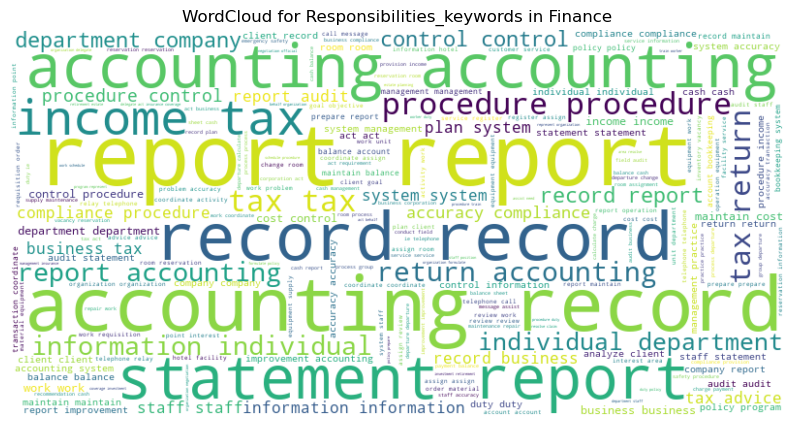

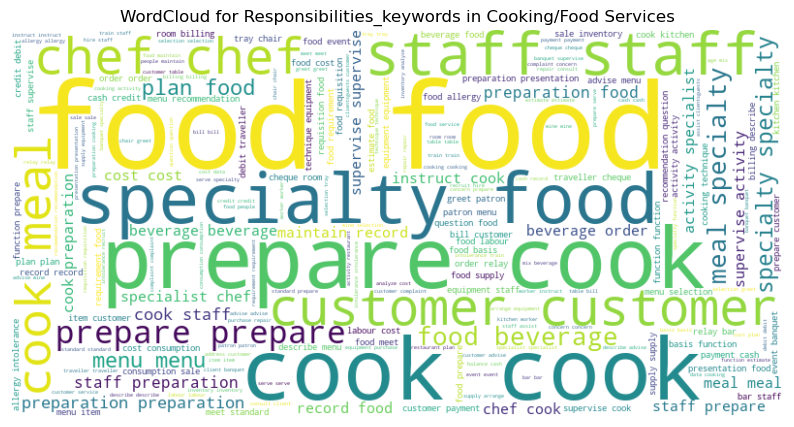

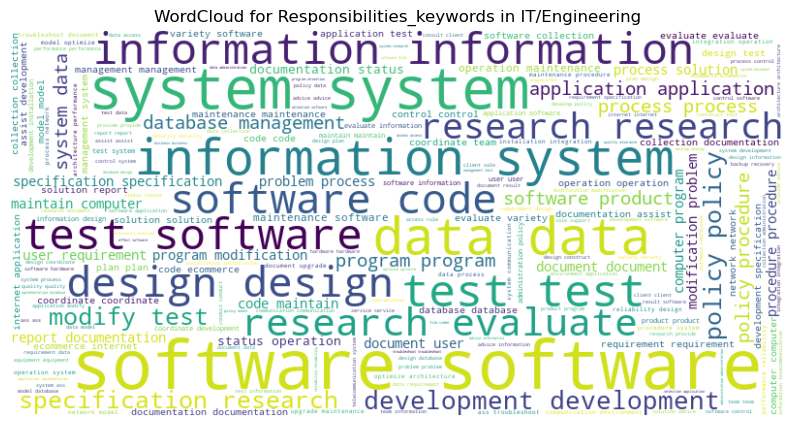

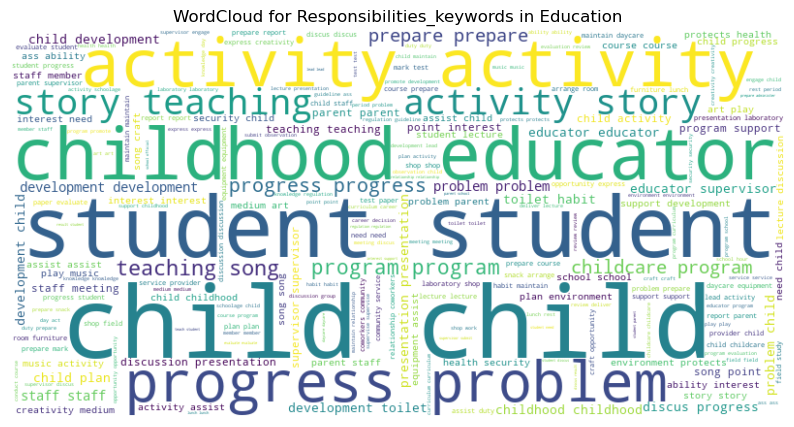

In [92]:

from wordcloud import WordCloud

# Assuming your DataFrame is named combined_job_df
# Replace 'category' and 'Responsibilities_keywords' with the actual column names.

categories = ['Finance', 'Cooking/Food Services', 'IT/Engineering', 'Education']

# Iterate over each category
for category in categories:
    # Filter DataFrame for the current category
    category_df = combined_job_df[combined_job_df['category'] == category]

    # Flatten and concatenate Responsibilities_keywords for the current category
    text = ' '.join([' '.join(keyword_list) for keyword_list in category_df['Responsibilities_keywords']])

    # Tokenize the text into words
    words = word_tokenize(text.lower())  # Convert to lowercase for consistency

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Create a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Responsibilities_keywords in {category}')
    plt.show()





**Iterating over each category and generating a WordCloud for the concatenated Responsibilities_keywords in that category.**
- In Finance : Report, Accounting, Income, Tax have higher frequency or significance. 
- In Food Industry : Cook, Food, Prepare, Chef have higher frequency or significance.
- In IT Sector : Software, System, Information, Code have higher frequency or significance.
- In Education Sector : child, Student , activity,progress,problem have higher frequency or significance.


**Tokenize the text, remove stopwords, and create a WordCloud visualization.**

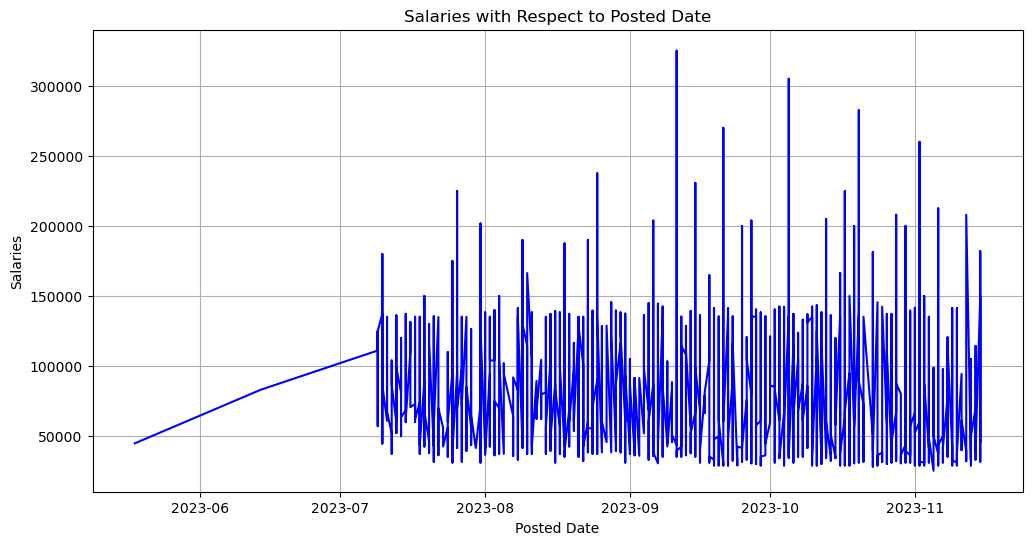

In [93]:

# Assuming your DataFrame is named combined_job_df
# Replace 'posted_date' and 'salaries' with the actual column names.

# Ensure 'posted_date' is in datetime format
combined_job_df['posted date'] = pd.to_datetime(combined_job_df['posted date'])

# Sort DataFrame by 'posted_date'
combined_job_df = combined_job_df.sort_values(by='posted date')

# Plotting line graph
plt.figure(figsize=(12, 6))
plt.plot(combined_job_df['posted date'], combined_job_df['salaries'],  linestyle='-', color='b')
plt.title('Salaries with Respect to Posted Date')
plt.xlabel('Posted Date')
plt.ylabel('Salaries')
plt.grid(True)
plt.show()


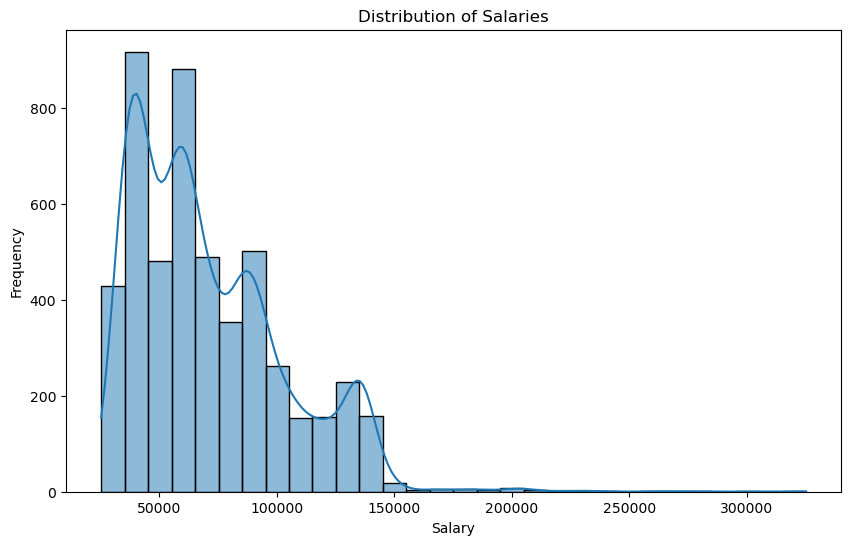

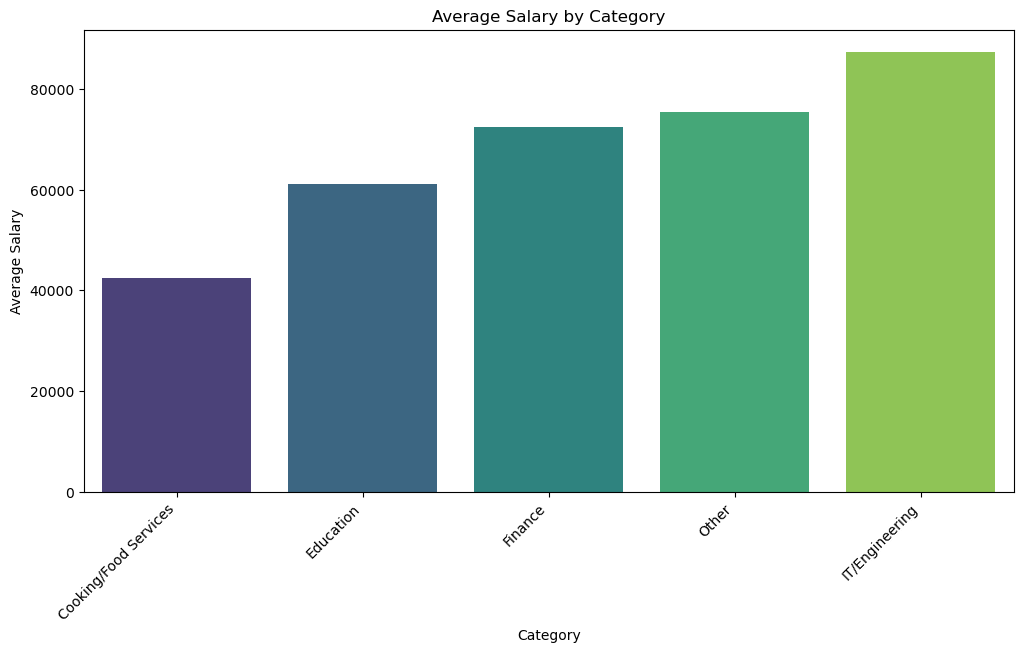

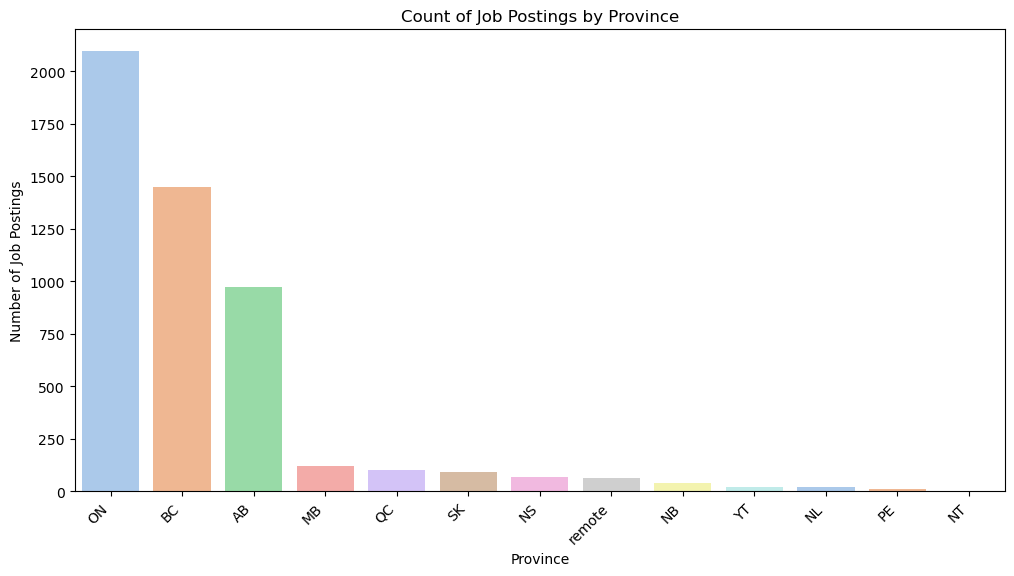

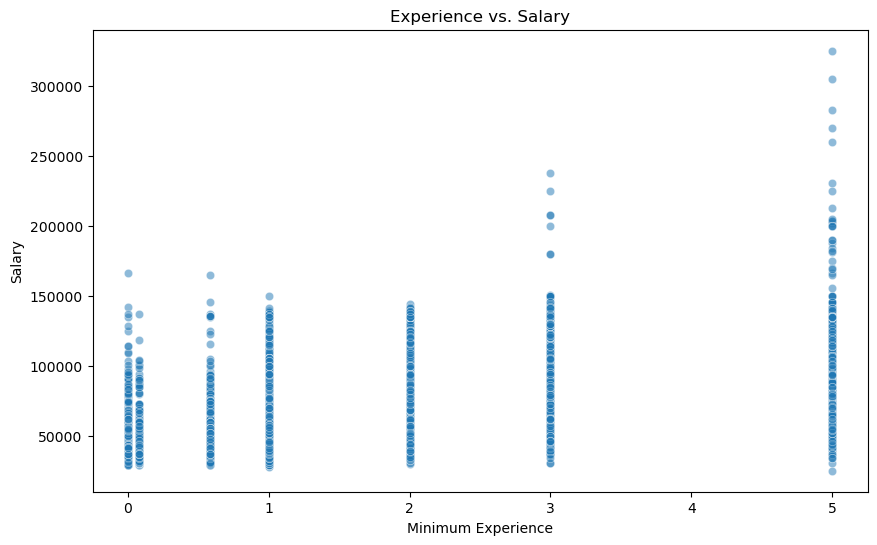

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named combined_job_df

# 1. Histogram of Salaries
plt.figure(figsize=(10, 6))
sns.histplot(combined_job_df['salaries'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 2. Average Salary by Category
avg_salary_by_category = combined_job_df.groupby('category')['salaries'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_category.index, y=avg_salary_by_category.values, palette='viridis')
plt.title('Average Salary by Category')
plt.xlabel('Category')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Count of Job Postings by City
job_postings_by_city = combined_job_df['Province'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=job_postings_by_city.index, y=job_postings_by_city.values, palette='pastel')
plt.title('Count of Job Postings by Province')
plt.xlabel('Province')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Experience vs. Salary Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Minimum Experience', y='salaries', data=combined_job_df, alpha=0.5)
plt.title('Experience vs. Salary')
plt.xlabel('Minimum Experience')
plt.ylabel('Salary')
plt.show()


### Explanations
* Salary is distributed mostly in range of 40k to 150k
* Ontario state has higher number of jobs
* IT sector has highest salaries
* Higher Salary requires higher experience


## Encoding categorical columns

In [95]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Columns for label encoding
label_columns = ['position', 'company', 'posted date','category', 'City', 'Province']


# Apply label encoding
label_encoder = LabelEncoder()
for column in label_columns:
    combined_job_df[column] = label_encoder.fit_transform(combined_job_df[column])



In [96]:
combined_job_df.head()

position  company            location  posted date  salaries  \
180        123     2333  Sherwood Park (AB)            0   44907.2   
386        729     1588         Bolton (ON)            1   83200.0   
349        185     2919         Surrey (BC)            2  111113.6   
1426       405     1252  Fort McMurray (AB)            2  125008.0   
345        185     3301         Surrey (BC)            2  111113.6   

                        Experience  \
180    1 year to less than 2 years   
386   2 years to less than 3 years   
349    1 year to less than 2 years   
1426  2 years to less than 3 years   
345    1 year to less than 2 years   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Responsibilities  \
180                                                                                                                                                                                                                                                                                                   Maintain records of food costs, consumption, sales and inventory, Demonstrate new cooking techniques and new equipment to cooking staff, Supervise activities of specialist chefs, chefs, cooks and other kitchen workers, Prepare and cook food on a regular basis, or for special guests or functions, Prepare and cook meals or specialty foods, Requisition food and kitchen supplies, Prepare dishes for customers with food allergies or intolerances, Train staff in preparation, cooking and handling of food   
386                                                                                                                                                                                                                        Write, modify, integrate and test software code, Maintain existing computer programs by making modifications as required, Identify and communicate technical problems, processes and solutions, Prepare reports, manuals and other documentation on the status, operation and maintenance of software, Assist in the collection and documentation of user's requirements, Assist in the development of logical and physical specifications, Research and evaluate a variety of software products, Write, modify, integrate and test software code for e-commerce and other Internet applications   
349   Collect and document user's requirements and develop logical and physical specifications, Research, evaluate and synthesize technical information to design, develop and test computer-based systems, Develop data, process and network models to optimize architecture and to evaluate the performance and reliability of designs, Plan, design and co-ordinate the development, installation, integration and operation of computer-based systems, Assess, troubleshoot, document, upgrade and develop maintenance procedures for operating systems, communications environments and applications software, Lead and co-ordinate teams of information systems professionals in the development of software and integrated information systems, process control software and other embedded software control systems   
1426                                                              Allocate material, human and financial resources to implement organizational policies and prog

In [97]:
from sklearn.feature_extraction.text import CountVectorizer


## Word Vectorization Techniques

### CountVectorizer

In [126]:
# Text vectorization for Responsibilities_Cleaned
vectorizer = CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, max_features=5000)
vectorized_data = vectorizer.fit_transform(combined_job_df['Responsibilities_Cleaned'])
vectorized_data = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_data.head()




accounting  accuracy  activity  administrative  analyze  application  \
0           0         0         1               0        0            0   
1           0         0         0               0        0            1   
2           0         0         0               0        0            1   
3           0         0         0               1        0            0   
4           0         0         0               0        0            1   

   approve  assist  beverage  business  chef  child  childhood  client  code  \
0        0       0         0         0     2      0          0       0     0   
1        0       2         0         0     0      0          0       0     2   
2        0       0         0         0     0      0          0       0     0   
3        3       0         0         0     0      0          0       0     0   
4        0       0         0         0     0      0          0       0     0   

   compliance  computer  conduct  control  cook  cooking  cost  course  \
0           0         0        0        0     3        3     1       0   
1           0         0        0        0     0        0     0       0   
2           0         0        0        2     0        0     0       0   
3           0         0        0        1     0        0     0       0   
4           0         0        0        2     0        0     0       0   

   customer  cut  data  department  design  develop  development  direct  \
0         1    0     0           0       0        0            0       0   
1         0    0     0           0       0        0            1       0   
2         0    0     1           0       3        4            2       0   
3         0    0     0           0       0        0            0       0   
4         0    0     1           0       3        4            2       0   

   discus  document  documentation  early  educator  ensure  equipment  \
0       0         0              0      0         0       0          1   
1       0         0              2      0         0       0          0   
2       0         2              0      0         0       0          0   
3       0         0              0      0         0       0          0   
4       0         2              0      0         0       0          0   

   establish  evaluate  examine  financial  finding  food  function  human  \
0          0         0        0          0        0     6         1      0   
1          0         1        0          0        0     0         0      0   
2          0         2        0          0        0     0         0      0   
3          2         0        0          2        0     0         0      2   
4          0         2        0          0        0     0         0      0   

   implement  income  information  integrate  interest  internal  inventory  \
0          0       0            0          0         0         0          1   
1          0       0            0          2         0         0          0   
2          0       0            3          0         0         0          0   
3          1       0            0          0         0         0          0   
4          0       0            3          0         0         0          0   

   kitchen  lead  maintain  meal  meat  menu  modify  network  new  operation  \
0        2     0         1     1     0     0       0        0    2          0   
1        0     0         0     0     0     0       2        0    0          1   
2        0     0         0     0     0     0       0        0    0          1   
3        0     0         0     0     0     0       0        0    0          0   
4        0     0         0     0     0     0       0        0    0          1   

   order  organization  organize  parent  physical  plan  policy  preparation  \
0      0             0         0       0         0     0       0            1   
1      0             0         0       0         0     0       0            0   
2      0             0         0       0         0

### TFIDFVectorizer

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame called 'combined_job_df' with the relevant columns

# TF-IDF vectorization for Responsibilities_Cleaned
tfidf_vectorizer = TfidfVectorizer(analyzer='word', tokenizer=None, preprocessor=None, max_features=5000)
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(combined_job_df['Responsibilities_Cleaned'])
tfidf_vectorized_data = pd.DataFrame(tfidf_vectorized_data.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_vectorized_data.head()

accounting  accuracy  activity  administrative  analyze  application  \
0         0.0       0.0   0.12895        0.000000      0.0     0.000000   
1         0.0       0.0   0.00000        0.000000      0.0     0.130114   
2         0.0       0.0   0.00000        0.000000      0.0     0.102100   
3         0.0       0.0   0.00000        0.146387      0.0     0.000000   
4         0.0       0.0   0.00000        0.000000      0.0     0.102100   

    approve    assist  beverage  business      chef  child  childhood  client  \
0  0.000000  0.000000       0.0       0.0  0.281345    0.0        0.0     0.0   
1  0.000000  0.293895       0.0       0.0  0.000000    0.0        0.0     0.0   
2  0.000000  0.000000       0.0       0.0  0.000000    0.0        0.0     0.0   
3  0.490731  0.000000       0.0       0.0  0.000000    0.0        0.0     0.0   
4  0.000000  0.000000       0.0       0.0  0.000000    0.0        0.0     0.0   

       code  compliance  computer  conduct   control     cook   cooking  \
0  0.000000         0.0       0.0      0.0  0.000000  0.35179  0.360524   
1  0.325826         0.0       0.0      0.0  0.000000  0.00000  0.000000   
2  0.000000         0.0       0.0      0.0  0.150625  0.00000  0.000000   
3  0.000000         0.0       0.0      0.0  0.103922  0.00000  0.000000   
4  0.000000         0.0       0.0      0.0  0.150625  0.00000  0.000000   

       cost  course  customer  cut      data  department    design   develop  \
0  0.125868     0.0  0.108228  0.0  0.000000         0.0  0.000000  0.000000   
1  0.000000     0.0  0.000000  0.0  0.000000         0.0  0.000000  0.000000   
2  0.000000     0.0  0.000000  0.0  0.112913         0.0  0.333417  0.412319   
3  0.000000     0.0  0.000000  0.0  0.000000         0.0  0.000000  0.000000   
4  0.000000     0.0  0.000000  0.0  0.112913         0.0  0.333417  0.412319   

   development  direct  discus  document  documentation  early  educator  \
0     0.000000     0.0     0.0  0.000000       0.000000    0.0       0.0   
1     0.126873     0.0     0.0  0.000000       0.329233    0.0       0.0   
2     0.199113     0.0     0.0  0.209704       0.000000    0.0       0.0   
3     0.000000     0.0     0.0  0.000000       0.000000    0.0       0.0   
4     0.199113     0.0     0.0  0.209704       0.000000    0.0       0.0   

   ensure  equipment  establish  evaluate  examine  financial  finding  \
0     0.0   0.082496   0.000000  0.000000      0.0   0.000000      0.0   
1     0.0   0.000000   0.000000  0.138608      0.0   0.000000      0.0   
2     0.0   0.000000   0.000000  0.217531      0.0   0.000000      0.0   
3     0.0   0.000000   0.256621  0.000000      0.0   0.288757      0.0   
4     0.0   0.000000   0.000000  0.217531      0.0   0.000000      0.0   

       food  function     human  implement  income  information  integrate  \
0  0.540917  0.132521  0.000000   0.000000     0.0     0.000000   0.000000   
1  0.000000  0.000000  0.000000   0.000000     0.0     0.000000   0.320171   
2  0.000000  0.000000  0.000000   0.000000     0.0     0.323909   0.000000   
3  0.000000  0.000000  0.296972   0.104335     0.0     0.000000   0.000000   
4  0.000000  0.000000  0.000000   0.000000     0.0     0.323909   0.000000   

   interest  internal  inventory   kitchen  lead  maintain      meal  meat  \
0       0.0       0.0   0.124056  0.203984   0.0  0.076565  0.120247   0.0   
1       0.0       0.0   0.000000  0.000000   0.0  0.000000  0.000000   0.0   
2       0.0       0.0   0.000000  0.000000   0.0  0.000000  0.000000   0.0   
3       0.0       0.0   0.000000  0.000000   0.0  0.000000  0.000000   0.0   
4       0.0       0.0   0.000000  0.000000   0.0  0.000000  0.000000   0.0   

   menu   modify  network      new  operation  order  organization  organize  \
0   0.0  0.00000      0.0  0.26014   0.000000    0.0      0.000000  0.000000   
1   0.0  0.29702      0.0  0.00000   0.101451    0.0      0.000000  0.000000   
2   0.0  0.00000      0.0  0.00000   0.079608    0.0 

## Applying model

In [128]:
jobbank_df['position'].value_counts()

chef                                                                                                                     329
server - food and beverage services                                                                                      206
software developer                                                                                                       194
general manager - financial, communications and other business services                                                  190
user support technician                                                                                                  173
food and beverage server                                                                                                 165
butcher, retail                                                                                                          116
administrative manager                                                                                                   112


### RandomForestRegressor

**Random Forest Results:**

* Count Vectorizer: Accuracy of 82.70%, training time of 7071.440 seconds
* TF-IDF Vectorizer: Accuracy of 83.12%, training time of 7133.566 seconds


#### Using CountVectorized data

In [129]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Reset indices
vectorized_data.reset_index(drop=True, inplace=True)
combined_job_df.reset_index(drop=True, inplace=True)

# Combine the transformed features with other columns
X = pd.concat([vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [130]:
import pandas as pd

# Assuming y_test contains the original salaries and y_pred contains the predicted salaries
results_df = pd.DataFrame({'Original Salaries': y_test, 'Predicted Salaries': y_pred})
results_df

Original Salaries  Predicted Salaries
4856            35360.0        36199.800000
952             42640.0        42784.560000
3309            66996.8        66809.392000
179             62400.0        60424.952000
589             37440.0        41093.520000
3768           135408.0       136016.400000
800             62400.0        68899.160000
2687            94515.2        94235.112000
3789            57200.0        58153.840000
65              60320.0        62212.384000
2943            60320.0        60332.480000
3366            97760.0        87976.992000
893             62400.0        64297.584000
4536            41600.0        36508.368000
763             87360.0        59754.240000
4317            60216.0        60170.280000
3782           133120.0       130535.680000
3654            80080.0        56844.624000
2210            30160.0        29452.800000
2925            56160.0        48066.544000
4291            56160.0        63212.640000
2295            49920.0        49240.760000
227             97760.0        97691.496000
3915           128960.0       136082.220000
1117            58240.0        61084.533333
33             135200.0       121104.640000
5057            52000.0        43170.128000
2099           135200.0       136626.600000
1210            67600.0        65176.608000
2603            88431.2        85153.340000
23             180000.0       157575.136000
1197            62400.0        61663.680000
3424            83720.0        87810.304000
3378           137280.0       121982.896000
4919            33280.0        35653.280000
731             76500.0        89192.456000
4626            31824.0        45675.016000
3274            45760.0        47666.128000
485             94515.2        89820.544000
3977            47320.0        49710.480000
2887            87360.0        85114.952000
2531            92560.0        76287.448000
828             42640.0        49471.768000
1370           108160.0       107276.000000
2133            42640.0        48425.624000
157             43680.0        43128.800000
1543            67600.0        69049.136000
5065            41600.0        45729.528000
911             47840.0        49528.752000
705            136032.0       134927.520000
416             52000.0        45585.880000
1755            95680.0        96379.296000
1741            62400.0        61710.480000
4472            72800.0        66270.600000
3321            49920.0        61276.824000
1010            42640.0        44372.120000
239             62400.0        72114.480000
1392            98800.0       102045.736000
4925            30160.0        29738.800000
3965            39936.0        46423.936000
106             62400.0        65775.528000
497             86320.0        81262.240000
3665            36400.0        37749.640000
3399            43680.0        43447.040000
3780            46800.0        48782.688000
2378            57200.0        52512.720000
1292            56160.0        56747.808000
1505            45552.0        37851.424000
297             86320.0        88123.264000
3617            41600.0        46493.736000
1888            37440.0        35756.240000
168             43680.0        43745.000000
1897           120640.0       137450.560000
1769            62400.0        62421.440000
3936            90480.0        89769.680000
4476            46800.0        47897.696000
1729            56160.0        55663.888000
1221            94515.2        94513.328000
915             85280.0        86129.504000
2280           136032.0       134079.920000
2784            52500.0        74557.691000
3545            44720.0        44908.240000
4387            34528.0        49752.488000
3767            81120.0        72920.692000
4083            50000.0        71093.636000
1047            39520.0        42378.848000
1718            47840.0        45797.960000
1966            49920.0        52265.136000
3479            47840.0        47378.984000
1375           104000.0       110007.760000
77

#### Evaluation Metrics for count vectorized data

In [131]:
from sklearn.metrics import r2_score

# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


R-squared: 0.8270601464311078
Mean Absolute Error: 7071.440367936976


#### Using TFIDFVectorized Data

In [132]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Combine the transformed features with other columns
X = pd.concat([tfidf_vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



#### Evaluation Metrics for tfidf Vectorized data

In [133]:
from sklearn.metrics import r2_score

# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.8312190536269225
Mean Absolute Error: 7133.566122264488


## Applying Linear Regression

**Linear Regression:**

* Count Vectorizer: Accuracy of 76.03%, training time of 10037.840 seconds
* TF-IDF Vectorizer: Accuracy of 80.22%, training time of 9008.518 seconds

### Using Count Vectorizer

In [134]:
from sklearn.linear_model import LinearRegression

# Combine the transformed features with other columns
X = pd.concat([vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


#### Evaluation Metrics for count vectorized data

In [135]:
from sklearn.metrics import r2_score

# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.7603029085127893
Mean Absolute Error: 10037.840513424328


### Using TFIDF Vectorizer 

In [136]:
# Combine the transformed features with other columns
X = pd.concat([tfidf_vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


#### Evaluation Metrics for tfidf Vectorized data

In [137]:
from sklearn.metrics import r2_score

# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.8022667400143131
Mean Absolute Error: 9008.51847497251


### Applying XGBoost

**XGBoost Regressor Results:**

* Count Vectorizer: Accuracy of 85.63%, training time of 7075.469 seconds
* TF-IDF Vectorizer: Accuracy of 82.35%, training time of 7524.974 seconds

#### Using Count Vectorizer

In [138]:
from xgboost import XGBRegressor

# Combine the transformed features with other columns
X = pd.concat([vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)




#### Evaluation Metrics for count Vectorized data

In [139]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Absolute Error: 7075.469451507026
R-squared: 0.8563566083873599


#### Using TFIDF Vectorizer

In [140]:


# Combine the transformed features with other columns
X = pd.concat([tfidf_vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


#### Evaluation Metrics for tfidf Vectorized data

In [141]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Absolute Error: 7524.974003790681
R-squared: 0.8235634546511508


## Applying LightGBM

**LightGBM Results:**

* Count Vectorizer: Accuracy of 86.38%, training time of 7111.758 seconds
* TF-IDF Vectorizer: Accuracy of 84.80%, training time of 7367.675 seconds

### Using Count Vectorizer

In [142]:
import lightgbm as lgb

# Combine the transformed features with other columns
X = pd.concat([vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 119
[LightGBM] [Info] Start training from score 71097.215487


#### Evaluation Metrics for count Vectorized data

In [143]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Absolute Error: 7111.758196263365
R-squared: 0.8638775168956501


### Using TFIDF Vectorizer

In [144]:
# Combine the transformed features with other columns
X = pd.concat([tfidf_vectorized_data, combined_job_df[['position', 'company', 'category', 'City', 'Province']]], axis=1)
y = combined_job_df['salaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10596
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 119
[LightGBM] [Info] Start training from score 71097.215487


#### Evaluation Metrics for tfidf Vectorized data

In [145]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# Evaluate the model with R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Absolute Error: 7367.675047001439
R-squared: 0.8480793012591017


## Creating a table to visualize the results of all the models

In [146]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [148]:
from prettytable import PrettyTable

# Creating a PrettyTable instance
table = PrettyTable()

# Defining table columns
table.field_names = ["Model", "Vectorizer", "R-squared", "Mean Absolute Error"]



# Adding data rows
table.add_row(["Random Forest", "Count Vectorizer",  0.8270, 7071.440])
table.add_row(["Random Forest", "TF-IDF Vectorizer", 0.8312, 7133.566])
table.add_row(["Linear Regression", "Count Vectorizer", 0.7603, 10037.840])
table.add_row(["Linear Regression", "TF-IDF Vectorizer", 0.8022, 9008.518])
table.add_row(["XGBoost Regressor", "Count Vectorizer",0.8563, 7075.469])
table.add_row(["XGBoost Regressor", "TF-IDF Vectorizer", 0.8235,7524.974])
table.add_row(["LightGBM", "Count Vectorizer", 0.8638,  7111.758])
table.add_row(["LightGBM", "TF-IDF Vectorizer", 0.8480, 7367.675])

# Printing  the table
print(table)


+-------------------+-------------------+-----------+---------------------+
|       Model       |     Vectorizer    | R-squared | Mean Absolute Error |
+-------------------+-------------------+-----------+---------------------+
|   Random Forest   |  Count Vectorizer |   0.827   |       7071.44       |
|   Random Forest   | TF-IDF Vectorizer |   0.8312  |       7133.566      |
| Linear Regression |  Count Vectorizer |   0.7603  |       10037.84      |
| Linear Regression | TF-IDF Vectorizer |   0.8022  |       9008.518      |
| XGBoost Regressor |  Count Vectorizer |   0.8563  |       7075.469      |
| XGBoost Regressor | TF-IDF Vectorizer |   0.8235  |       7524.974      |
|      LightGBM     |  Count Vectorizer |   0.8638  |       7111.758      |
|      LightGBM     | TF-IDF Vectorizer |   0.848   |       7367.675      |
+-------------------+-------------------+-----------+---------------------+


**Conclusion**

* 
LightGBM with Count Vectorizer outperformed other models, boasting the highest accuracy (86.38%) while maintaining competitive training efficiency (7111.758 seconds). Its gradient boosting algorithm and efficient handling of large datasets contribute to its superior predictive capabilities, making it the optimal choice among the evaluated regression models.











## Generating Pandas Profiling Report

In [149]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\asus\\anaconda3\\lib\\site-packages\\idna-3.4.dist-info\\METADATA'



In [152]:
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(combined_job_df)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [153]:
profile.to_file("nlp_profiling_report.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]